In [ ]:
%matplotlib inline

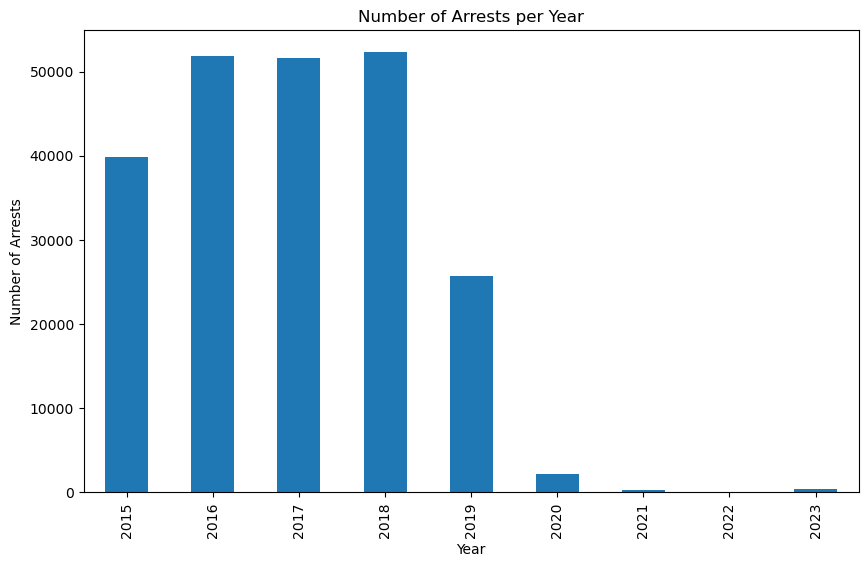

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Resources/Crimes_2015toPresent.csv')
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Count number of TRUE rows in Arrests column and group them per year
arrests_per_year = data[data['Arrest'] == True].groupby('Year').size()

arrests_per_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Year')
plt.show()

In [16]:
top_10_common_description = data['Description'].value_counts().head(10)

print(top_10_common_description)

SIMPLE                          49963
$500 AND UNDER                  46301
DOMESTIC BATTERY SIMPLE         43123
OVER $500                       29938
RETAIL THEFT                    29538
FROM BUILDING                   22155
TO VEHICLE                      19767
TO PROPERTY                     16485
AUTOMOBILE                      16035
POSS: CANNABIS 30GMS OR LESS    12765
Name: Description, dtype: int64


In [24]:
data_filtered = data[(data['Year'] >= 2015) & (data['Year'] <= 2022)]

# Filter data where Arrests is True
data_arrests_true = data_filtered[data_filtered['Arrest'] == True]

# Group data by Year and find top 10 common descriptions for each year
top_10_common_descriptions_per_year = data_arrests_true.groupby('Year')['Description'].value_counts().groupby(level=0).head(10)

print(top_10_common_descriptions_per_year)

Year  Description                   
2015  POSS: CANNABIS 30GMS OR LESS      5476
      DOMESTIC BATTERY SIMPLE           3528
      SIMPLE                            3163
      RETAIL THEFT                      2998
      POSS: HEROIN(WHITE)               2079
                                        ... 
2022  POSSESS - HALLUCINOGENS              3
      POSSESS - METHAMPHETAMINE            3
      AGGRAVATED VEHICULAR HIJACKING       1
      AUTOMOBILE                           1
      CREDIT CARD FRAUD                    1
Name: Description, Length: 80, dtype: int64


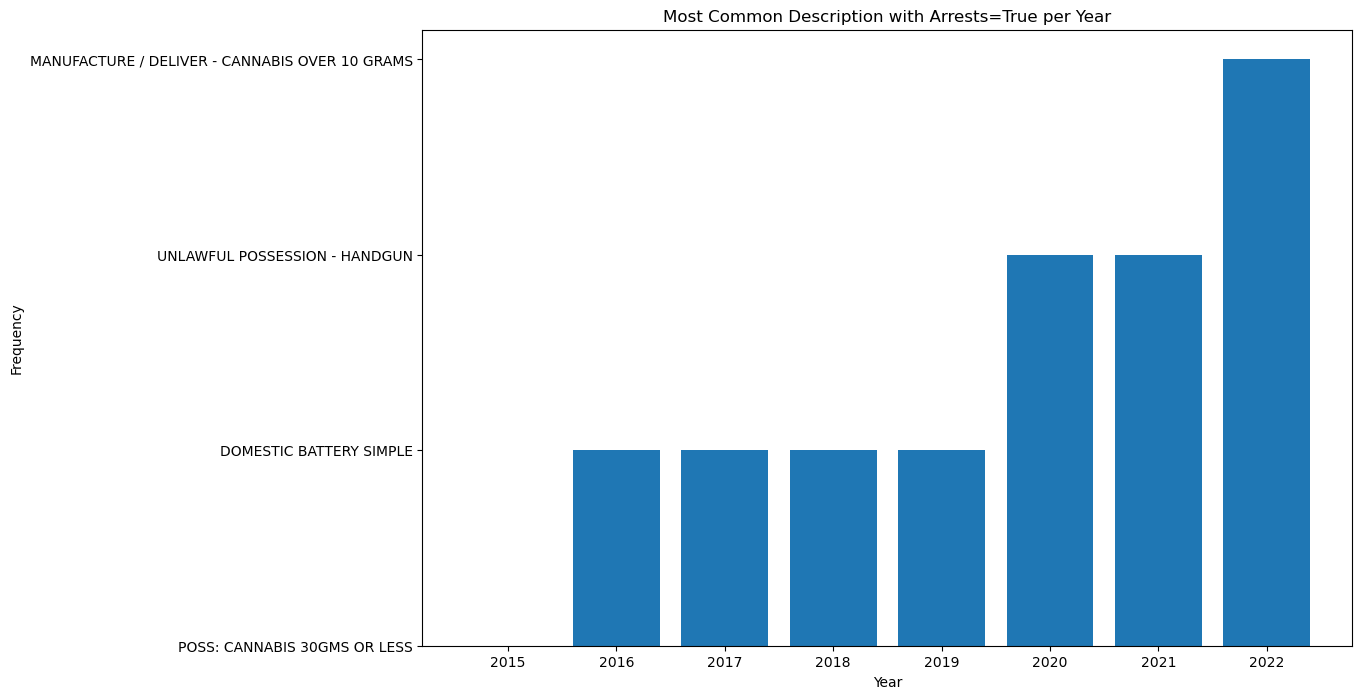

In [32]:

data_filtered = data[(data['Year'] >= 2015) & (data['Year'] <= 2022)]

# Filter data where Arrests is True
data_arrests_true = data_filtered[data_filtered['Arrest'] == True]

# Find the most common description for each year
most_common_description_per_year = data_arrests_true.groupby('Year')['Description'].apply(lambda x: x.value_counts().idxmax()).reset_index()

# Plot the graph
plt.figure(figsize=(12, 8))
plt.bar(most_common_description_per_year['Year'], most_common_description_per_year['Description'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Most Common Description with Arrests=True per Year')
plt.xticks(most_common_description_per_year['Year'])
plt.show()


In [33]:
most_common_description_per_year

,Year,Description
0,2015,POSS: CANNABIS 30GMS OR LESS
1,2016,DOMESTIC BATTERY SIMPLE
2,2017,DOMESTIC BATTERY SIMPLE
3,2018,DOMESTIC BATTERY SIMPLE
4,2019,DOMESTIC BATTERY SIMPLE
5,2020,UNLAWFUL POSSESSION - HANDGUN
6,2021,UNLAWFUL POSSESSION - HANDGUN
7,2022,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS


In [35]:
# Most common district overall
most_common_district = data['District'].value_counts().idxmax()

# Filter data where Arrests is True
data_arrests_true = data[data['Arrest'] == True]

# Most common district with Arrests as True
most_common_district_arrests_true = data_arrests_true['District'].value_counts().idxmax()

print("Most common district overall:", most_common_district)
print("Most common district with Arrests=True:", most_common_district_arrests_true)

Most common district overall: 25.0
Most common district with Arrests=True: 11.0


In [36]:
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 25)]

# Get the description
description = filtered_data['Description'].values[0]

print("Description with Arrests=True and District=25:", description)

Description with Arrests=True and District=25: SIMPLE


In [38]:
data_filtered = data[data['Description'] != 'SIMPLE']

# Filter data where Arrests is True and District is 25
filtered_data = data_filtered[(data_filtered['Arrest'] == True) & (data_filtered['District'] == 25)]

# Get the description
description = filtered_data['Description'].values[0]

print("Description with Arrests=True, District=25, and no SIMPLE description:", description)

Description with Arrests=True, District=25, and no SIMPLE description: POSS: HEROIN(WHITE)


In [40]:
filtered_data = data[(data['Arrest'] == True) & (data['District'] == 11)]

# Get the description
description = filtered_data['Description'].values[0]

print("Description with Arrests=True and District=11:", description)

Description with Arrests=True and District=11: VEHICLE TITLE/REG OFFENSE
